## Problem 1: Regression Problem 
The data in the file regression_housedata.csv are collected from 1,000 homes being sold in
Oslo. The response variable of interest is the Price (the price of the house). The input variables
are bedrooms, sqft_living (the living space area), sqft_lot (the area of the land the house sits
on), floors (the number of levels of the house), sqft_above (area of the house excluding the
basement), sqft_basement (basement area).
Use Multi-Linear Regressor, Decision Tree Regressor, and Support Vector Regressor to build
a regression model for the prediction of house prices. Perform Model Evaluation using two
metrics: Root Mean Squared Error and Coefficient of Determination. Which of the regression
models is the best fit for the data?

### Importing Needed packages


In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

### Understanding the data

### regression_housedata.csv
Collected from 1,000 homes being sold in Oslo. 

The response variable of interest is 
    - the Price (the price of the house). 

The input variables are 
    - bedrooms, 
    - sqft_living (the living space area), 
    - sqft_lot (the area of the land the house sits on), 
    - floors (the number of levels of the house), 
    - sqft_above (area of the house excluding the basement), 
    - sqft_basement (basement area). 

### Task
    1) Use Multi-Linear Regressor, 
    2) Decision Tree Regressor, 
    3) and Support Vector Regressor 

### Goal
    1) To build a regression model for the prediction of house prices. 
    2) Perform Model Evaluation using two metrics: Root Mean Squared Error and Coefficient of Determination. 
    3) Which of the regression models is the best fit for the data?

### 1) Import the data

In [38]:
df = pd.read_csv('regression_housedata.csv', sep=';')

# explore the dataset
df.head(10)

,id,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
0,7129300520,3,1180,5650,1,1180,0,221900.0
1,6414100192,3,2570,7242,2,2170,400,538000.0
2,5631500400,2,770,10000,1,770,0,180000.0
3,2487200875,4,1960,5000,1,1050,910,604000.0
4,1954400510,3,1680,8080,1,1680,0,510000.0
5,7237550310,4,5420,101930,1,3890,1530,1230000.0
6,1321400060,3,1715,6819,2,1715,0,257500.0
7,2008000270,3,1060,9711,1,1060,0,291850.0
8,2414600126,3,1780,7470,1,1050,730,229500.0
9,3793500160,3,1890,6560,2,1890,0,323000.0


In [39]:
# Drop non-informative columns, The 'id' column
df.drop('id', inplace = True,axis=1)
df.head(10)

,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
0,3,1180,5650,1,1180,0,221900.0
1,3,2570,7242,2,2170,400,538000.0
2,2,770,10000,1,770,0,180000.0
3,4,1960,5000,1,1050,910,604000.0
4,3,1680,8080,1,1680,0,510000.0
5,4,5420,101930,1,3890,1530,1230000.0
6,3,1715,6819,2,1715,0,257500.0
7,3,1060,9711,1,1060,0,291850.0
8,3,1780,7470,1,1050,730,229500.0
9,3,1890,6560,2,1890,0,323000.0


In [40]:
df.shape

(999, 7)

## 2) Data Exploration
Firstly, explore descriptive data.

In [41]:
# Summarize the data
df.describe()

,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02
mean,3.349349,2051.397397,14707.242242,1.397397,1750.233233,301.164164,5.207145e+05
std,0.852367,888.351113,28975.077254,0.527057,790.466905,451.023402,3.397491e+05
min,0.000000,380.000000,649.000000,1.000000,380.000000,0.000000,8.000000e+04
25%,3.000000,1405.000000,5419.000000,1.000000,1190.000000,0.000000,3.098000e+05
50%,3.000000,1900.000000,8040.000000,1.000000,1540.000000,0.000000,4.350000e+05
75%,4.000000,2475.000000,11508.500000,2.000000,2135.000000,580.000000,6.344625e+05
max,7.000000,6070.000000,315374.000000,3.000000,6070.000000,2060.000000,3.080000e+06


In [42]:
# To print all the column name.
df.columns

Index(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'price'],
      dtype='object')

In [43]:
# How many missing values are there in each column?
df.isna().sum()

bedrooms         0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
price            0
dtype: int64

In [44]:
# Whic rows have misisng data points?
# df.isnull().any(axis=1)
df.isnull().sum()

bedrooms         0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
price            0
dtype: int64

In [45]:
# showing the number of zeros in each column. 
# sqft_basement = 0 : It is normal for some house to have sqft_basement = 0. This indicates that that house might do not have basement.
# Bedrooms = 0 : In this case, this can be common in certain types of properties like studio room. Hence, 0 value in 'bedrooms' will be left as it is.
zero = (df == 0).sum()
zero

bedrooms           1
sqft_living        0
sqft_lot           0
floors             0
sqft_above         0
sqft_basement    598
price              0
dtype: int64

In [46]:
# Shape of the dataset.
df.shape

(999, 7)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       999 non-null    int64  
 1   sqft_living    999 non-null    int64  
 2   sqft_lot       999 non-null    int64  
 3   floors         999 non-null    int64  
 4   sqft_above     999 non-null    int64  
 5   sqft_basement  999 non-null    int64  
 6   price          999 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


In [48]:
# Analyzing the impact of having a basement on the price
df.groupby('sqft_basement')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
sqft_basement,,,,,,,,
0,598.0,4.615237e+05,2.583386e+05,80000.0,283212.5,386350.0,563750.0,2130000.0
50,2.0,4.269440e+05,1.528143e+05,318888.0,372916.0,426944.0,480972.0,535000.0
60,1.0,2.000000e+05,NaN,200000.0,200000.0,200000.0,200000.0,200000.0
120,3.0,4.981667e+05,6.786076e+04,420000.0,476250.0,532500.0,537250.0,542000.0
130,2.0,5.697500e+05,2.259206e+05,410000.0,489875.0,569750.0,649625.0,729500.0
...,...,...,...,...,...,...,...,...
1830,1.0,1.200000e+06,NaN,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0
1900,1.0,9.300000e+05,NaN,930000.0,930000.0,930000.0,930000.0,930000.0
1950,2.0,2.075000e+06,1.421285e+06,1070000.0,1572500.0,2075000.0,2577500.0,3080000.0


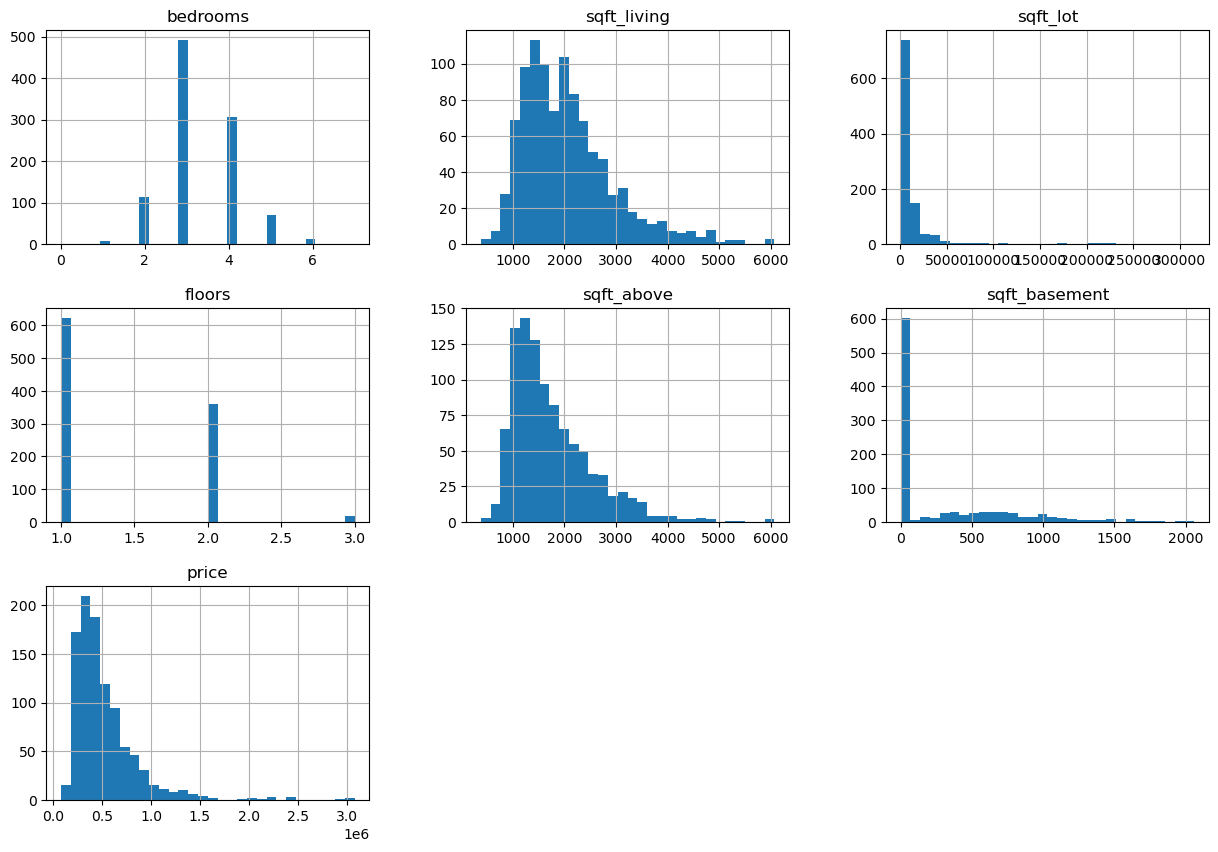

In [49]:
# Histogram to understand the distribution of data
df.hist(bins=30, figsize=(15,10))
plt.show()

#### Plot bedroom features against the price, to see how linear their relationship is:

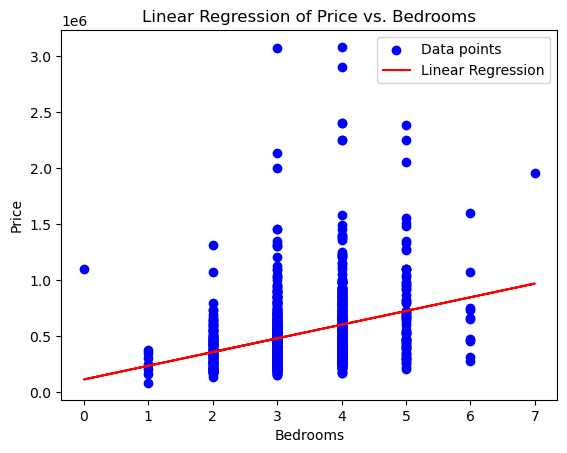

Slope (Price increase per bedroom): 122323.30


In [50]:
# Linear regression using numpy's polyfit
slope, intercept = np.polyfit(df['bedrooms'], df['price'], 1)

# Scatter plot
plt.scatter(df['bedrooms'], df['price'], color='blue', label='Data points')
plt.plot(df['bedrooms'], slope*np.array(df['bedrooms']) + intercept, color='red', label='Linear Regression')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.title('Linear Regression of Price vs. Bedrooms')
plt.show()

print(f"Slope (Price increase per bedroom): {slope:.2f}")

The provided plot and code depict a linear regression analysis between the number of bedrooms in a house and its price. 
   - The value provided as `Slope (Price increase per bedroom): 122232.30` suggests that, on average, for each additional bedroom in a house, its price increases by $122,232.30.

## 3) Creating train and test dataset
After cleaning the dataset, the next step is to split the data into segments for traning and testing, also no as split validation. The ratio of two splits is 80/20

In [51]:
df.columns

Index(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'price'],
      dtype='object')

In [52]:
X = df.drop('price', axis = 1)
y = df['price']

In [53]:
print(X.shape)
print(y.shape)

(999, 6)
(999,)


In [54]:
#Note: Randomness is often use to improve the generalization of models and avoid overlifting. 
# By setting a fix random state, you can assure that the same sequence of random numbers that will generated everytime you run algorithm.
# A common rule of thumb is o use a random_state that is at least 42 or larger. 
# This is because 42 is the answer to ultimate question of life. 
# The universe and everything (according to Douglas Adams)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (799, 6) (799,)
Test set: (200, 6) (200,)


In [56]:
# This is a step in preparing data for a regression model, particulary the hosuing dataset provided, variables like
# sqft_living, 'sqft_lot', 'sqft_above', and 'sqft_basement' could have a wide range of values, potentially
# spanning several orders of magnitued which can skew the regresion model.

from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4) Implement algorithms model

## Multi Linear Regression


In [57]:
# Create a linear regression model
multiple_regression = linear_model.LinearRegression()

# fitting the model
multiple_regression.fit(X_train, y_train)


LinearRegression()

In [58]:
print('Coefficients:', multiple_regression.coef_)
print('')
print('Intercept:', multiple_regression.intercept_)

Coefficients: [-392644.03310305  916086.67879463  -57338.74250767  -50553.1395744
  781401.54000925  372018.6600431 ]

Intercept: 211865.4825392302


### Prediction
we use the predict() function t run the model on the X_train data nd evaluate its performance againts teh actual y_train data.

In [59]:
y_prediction_multiple_re = multiple_regression.predict(X_test)

### Evaluate the model with metrics


In [60]:
# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(y_test, y_prediction_multiple_re))

print('Coefficient of determination(r2): %.2f'
      % r2_score(y_test, y_prediction_multiple_re))


Mean squared error: 47557042059.79
Coefficient of determination(r2): 0.47


###  The evaluation matrix: 

In conclusion, The model seems to be of moderate quality. An R2 of 0.47 means the model is explaining about 47% of the variance in the in dependent variable that is predictable from the indepent varaibles but suggest there might be more complex underlying patterns in the data that the model is not capturing.

## Desition Tree Regressor
Note : numerical Data X0 <= 1 and X0 <= 2. Divided into group of the number of example.The objective is to reduce the variance for dependence variable. Broken down by categories for continous variables.
Decision Tree -> Decision Nodes and leaf nodes.

## Setting up the Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=3)
regressor
    

DecisionTreeRegressor(max_depth=3)

In [62]:
# Next we fit the data with the trianing features matrix X and training response vector y

In [63]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [64]:
X_train.shape

(799, 6)

## Prediction
Make some predictions on the dataset and store in variables called predTree

In [65]:
predTree = regressor.predict(X_test)
print(predTree [0:5])
print(y_test [0:5])

[540905.90909091 350547.95170455 540905.90909091 853640.66176471
 540905.90909091]
453    691100.0
793    249950.0
209    464000.0
309    665000.0
740    360000.0
Name: price, dtype: float64


## Evaluation
Import metrics from sklearn and check the accuracy of our model.

In [66]:
from sklearn import metrics

tree_rmse = np.sqrt(mean_squared_error(y_test, predTree))
tree_r2 = r2_score(y_test, predTree)


print(f'Decision Tree RMSE(Mean squared error): {tree_rmse}, \nCoefficient of Determination or R2: {tree_r2}')

Decision Tree RMSE(Mean squared error): 223529.1389434086, 
Coefficient of Determination or R2: 0.4442357290841149


###  The evaluation matrix: 

A values of 0.4442 means that the model explain about 42% of the variance in the target variable in the target varaible, which is generallly considerd low.

In conclusion, based on the provided metrics, the decision tree model does not appear to be a good model for this dataset.

## Support Vector Regressor 

In [67]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [68]:
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [69]:
# Preditng the new result
y_predSV = regressor.predict(X_test)
# print(y_predSV)

In [70]:
from sklearn import metrics

# Calculating the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_predSV))
print(f'Mean Sqaure Error: {rmse}')
      
# Calculating the R^2 score
r2 = r2_score(y_test, y_predSV)
print(f'Coefficient of Determination R2: {r2}')


Mean Sqaure Error: 304345.28627713077
Coefficient of Determination R2: -0.03028052948225035


###  The evaluation matrix: 

The evaluation of model matrix shown that the model is not performing well:

The R2 values produces -0.030 accuracy. If R2 value close to 1 indicates that the model explains a sifnificant proportion of the variance in the dependent variable. A negative R2 in this case, shown that model is performing worse than a simple model that always predicts the mean of the observed values. This is a clear indicate a poor model fit.

Hence, it is can be said that the model is not good and is not fitting the data well. The choice of SVR with a linear kernel may not be the best fit fot this dataset.

# Conclusion: 

To point out which regression model is the most apperciate fit for predicting house prices, based on variables like bedroom, sqft_living(living space area), sqft_lot(land area), floors(number of house levels), sqft_above (area excluding the basement), and sqft_basement (basement area), we evaluate using two primary metrics: Root Mean Squared error (RMSE) and the Coefficient of Determination(R2).

- Multilinear regression:
    - Mean squared error: 47557042059.79
    - Coefficient of determination R2: 0.47



- Decision tree:
    - Mean squared error: 223529.1389434086, 
    - Coefficient of Determination R2: 0.4442357290841149


- SVR:
    - Mean Sqaure Error: 304345.28627713077
    - Coefficient of Determination R2: -0.03028052948225035

From the data presented ,although multilinear regression has the highest R2 score, suggesting it might offer the best fit among the three for predicting house price based on the given variables. However, it is exceedingly high in RMSE of 47557042059.79 is much larger than price range. In contast, the decision tree model achieves about 0.44 or about 44% accuracy, explaining approximately 44% of the variance in house prices. Although, The RMSE falling within the range of the majority of house prices suggests that the decision tree model may not be a good fit, as the error is high relative to many of the house price values. Considering the large MSE for Multilinear Regression, the Decision Tree seems to be a better fit in terms of prediction error, even though its R2 is lower.

The SVR model, with is negative R2, indicate it is performing worse than a simple mean prediction. 

In conclusion, while Decision tree model appears to be the most suitable among the evluated models but still below the often-considerd threshold, indicating the potential underfitting, exploring others modeling thecniques may show better results.

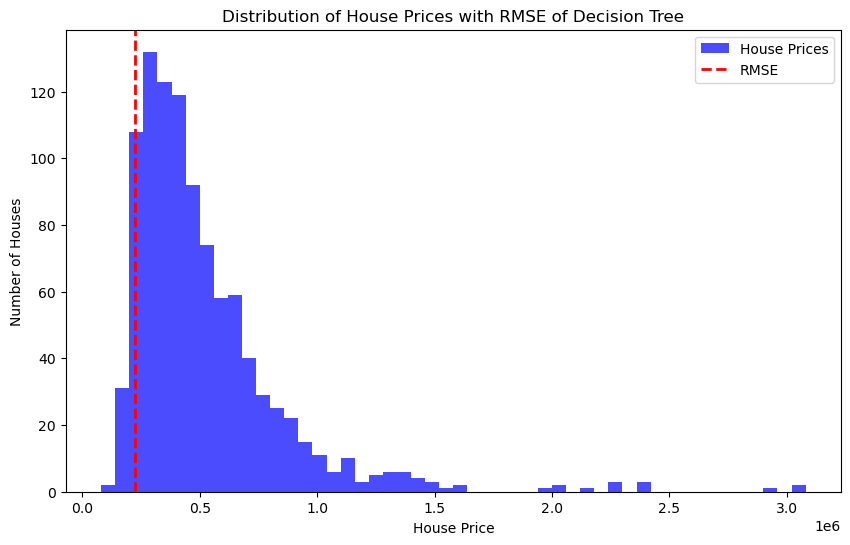

In [71]:
# Shows the distribution of house price The red dashed line represents the RMSE value. 
# If the RMSE line is within the range of the majority of house prices, then the RMSE might be considered high. 

import matplotlib.pyplot as plt

# Plotting the histogram of house prices
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=50, alpha=0.7, color='blue', label='House Prices')
plt.axvline(x=223529.1389434086, color='r', linestyle='dashed', linewidth=2, label='RMSE')
plt.xlabel('House Price')
plt.ylabel('Number of Houses')
plt.legend()
plt.title('Distribution of House Prices with RMSE of Decision Tree')
plt.show()


This histogram useful to compare house prices with the RMSE of the decision tree mode. The histogram shows that the RMSE (Red line) falls within the range of the majority of house prices, suggesting the error might be considered high for many of the house price predictions.